In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
gd = pd.read_csv('gld_price_data.csv')
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
coreleation=gd.corr()
coreleation

C:\Users\Kaustubh\AppData\Local\Temp\ipykernel_30492\2758737274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coreleation=gd.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

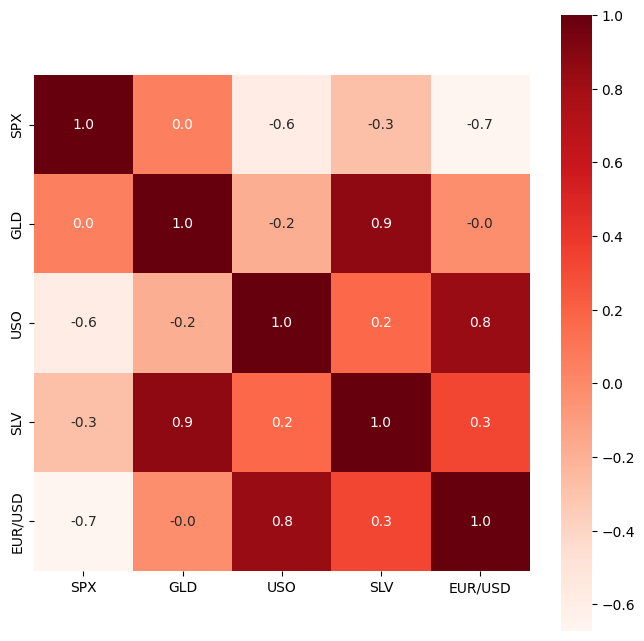

In [13]:
plt.figure(figsize=(8,8))
sb.heatmap(coreleation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

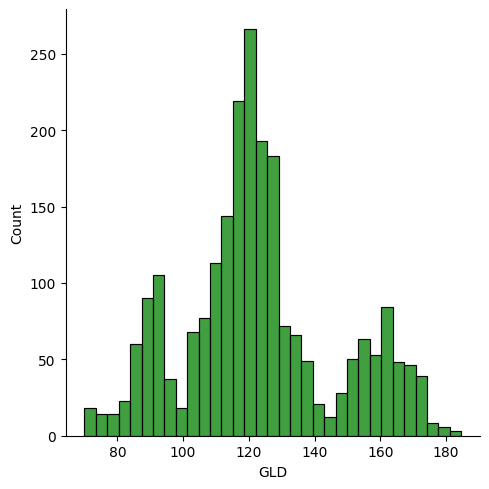

In [14]:
sb.displot(gd['GLD'],color='green')

In [19]:
x=gd.drop(['Date','GLD'],axis=1)
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [20]:
y=gd['GLD']
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


def find_best_model(x,y):
    ml = {
        'Random_forest_regressor' : {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10,12,15,20]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    for ml_name, mp in ml.items():
        gs =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': ml_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(

,model,best_score,best_params
0,Random_forest_regressor,-0.268418,{'n_estimators': 10}
1,lasso,-0.218491,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,-0.257147,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [26]:
rg=RandomForestRegressor()
rg.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
y_pred=rg.predict(x_test)
y_pred

array([168.45409916,  82.15659973, 115.93140027, 127.65890073,
       120.94210119, 154.59529734, 150.21499887, 126.08830052,
       117.38579887, 126.03380051, 116.67580089, 170.69700039,
       141.70069831, 167.86839788, 115.04819994, 117.58540027,
       137.70810394, 170.20540075, 159.47150247, 156.62629854,
       155.11170023, 125.44210034, 176.1100999 , 157.05550385,
       125.22210021,  93.77019983,  77.1424004 , 120.40579977,
       119.07369912, 167.38529985,  88.42780053, 125.26310028,
        91.0690004 , 117.79820022, 121.14049928, 136.2583005 ,
       115.57040128, 115.33100041, 149.22399997, 106.97410113,
       104.22200229,  87.18249795, 126.49580046, 117.88509995,
       151.94419861, 119.69569999, 108.46490016, 107.98249837,
        93.1022002 , 127.0823979 ,  75.01380001, 113.68059983,
       121.25620003, 111.15479934, 118.88919895, 120.81019915,
       158.68150018, 168.81880052, 147.06379699,  85.7935985 ,
        94.28100014,  86.68499868,  90.69920035, 119.05

In [30]:
from sklearn import metrics

r2=metrics.r2_score(y_test,y_pred)
r2

0.9890511015358247

In [31]:
y_test=list(y_test)

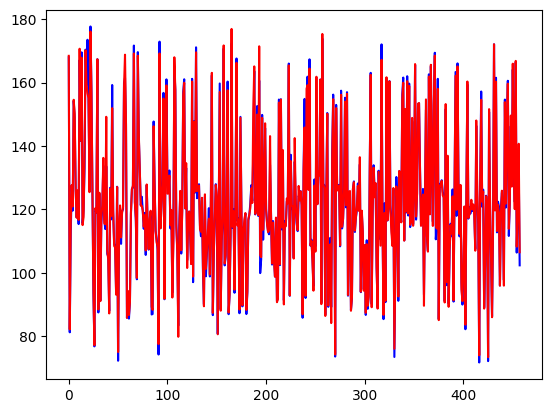

In [33]:
plt.plot(y_test,color='blue',label='actual value')
plt.plot(y_pred,color='red',label='predicted value')

In [35]:
import numpy as np 
input_data=(1447.160034,78.470001,15.1800,1.471692)
convert_to_array=np.asarray(input_data)
re_shape=convert_to_array.reshape(1,-1)
prediction=rg.predict(re_shape)
print(prediction)

[85.04320021]


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
